# **COLLEGE EVENT FEEDBACK ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import io

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = pd.read_csv('student_feedback.csv')
data.head(10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10
8,8,814,6,5,8,6,4,4,7,9
9,9,863,5,9,4,7,9,4,4,5


In [ ]:
data = data.drop(columns=['Unnamed: 0'])
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [ ]:
data.columns = ['Student_ID', 'Subject_Knowledge', 'Explanation_Clarity', 'Presentation_Use',
                'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure',
                'Advanced_Support', 'Course_Recommendation']

print("\nSummary Statistics:\n", data.describe())



Summary Statistics:
         Student_ID  Subject_Knowledge  Explanation_Clarity  Presentation_Use  \
count  1001.000000        1001.000000          1001.000000       1001.000000   
mean    500.000000           7.497502             6.081918          5.942058   
std     289.108111           1.692998             2.597168          1.415853   
min       0.000000           5.000000             2.000000          4.000000   
25%     250.000000           6.000000             4.000000          5.000000   
50%     500.000000           8.000000             6.000000          6.000000   
75%     750.000000           9.000000             8.000000          7.000000   
max    1000.000000          10.000000            10.000000          8.000000   

       Assignment_Difficulty  Doubt_Resolution  Course_Structure  \
count            1001.000000       1001.000000       1001.000000   
mean                5.430569          5.474525          5.636364   
std                 2.869046          2.874648       

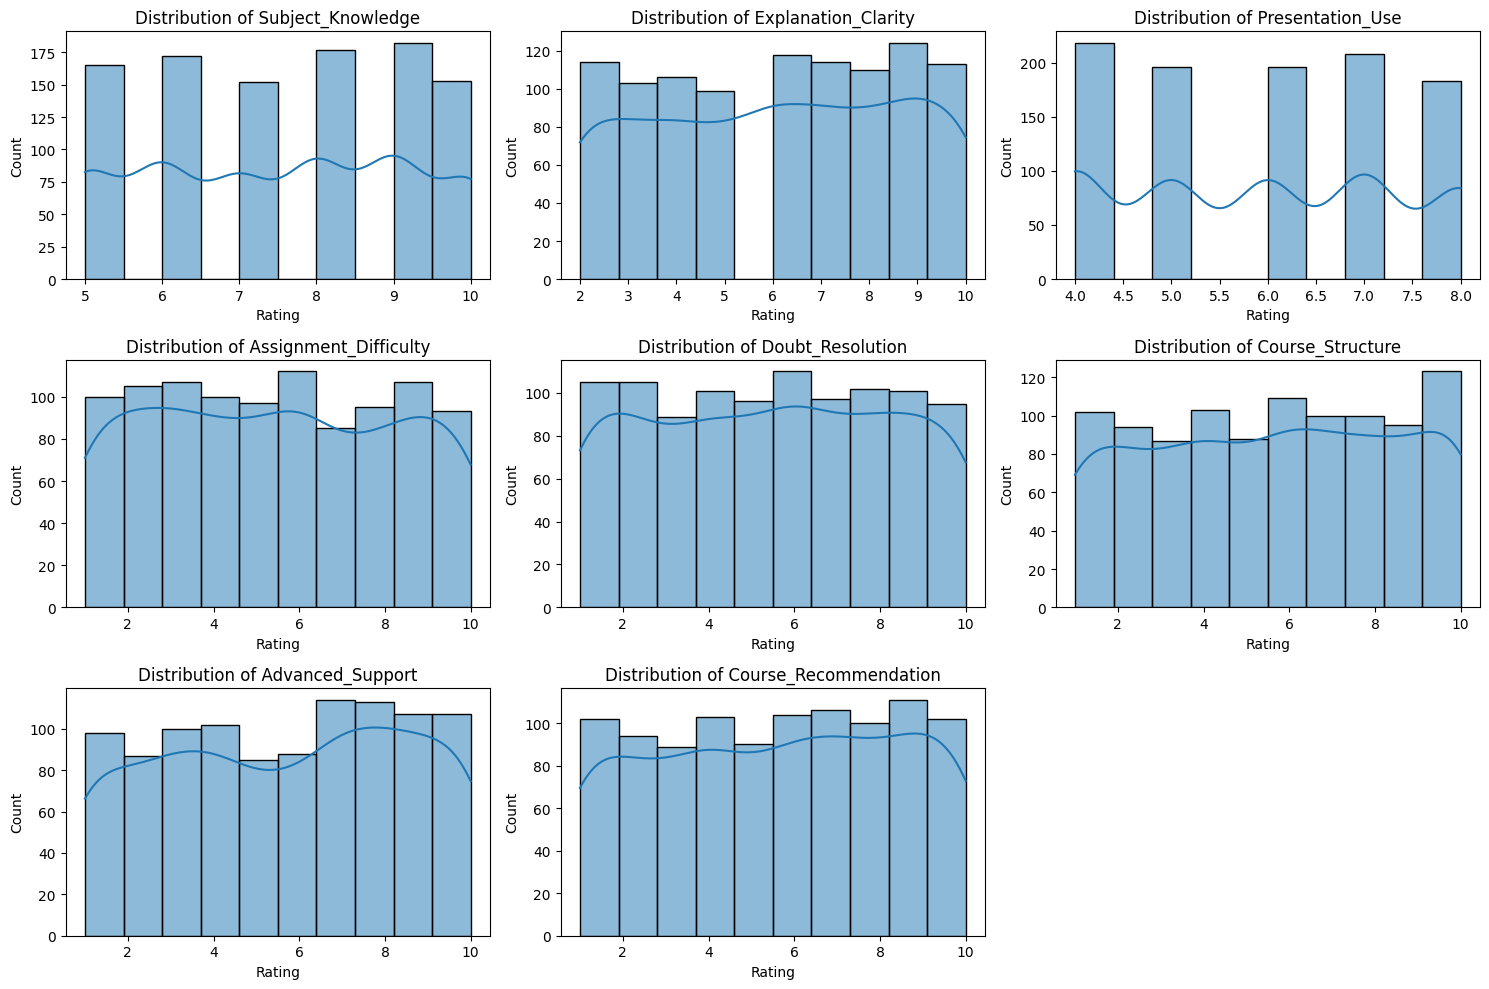

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

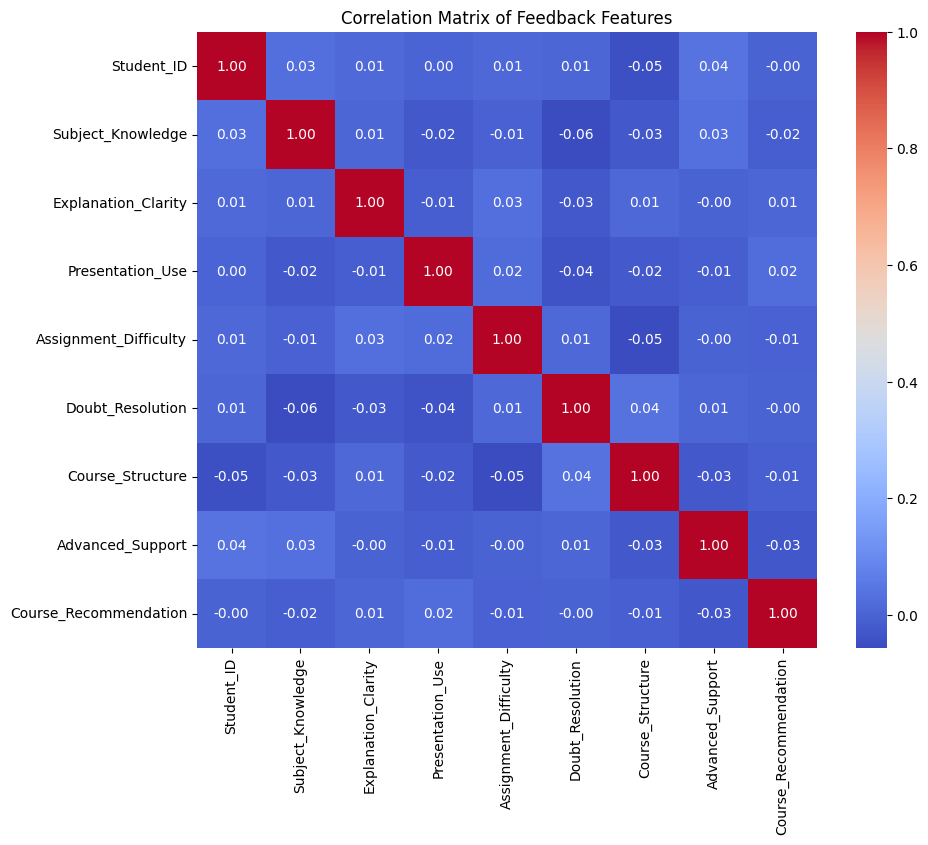

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Feedback Features')
plt.show()

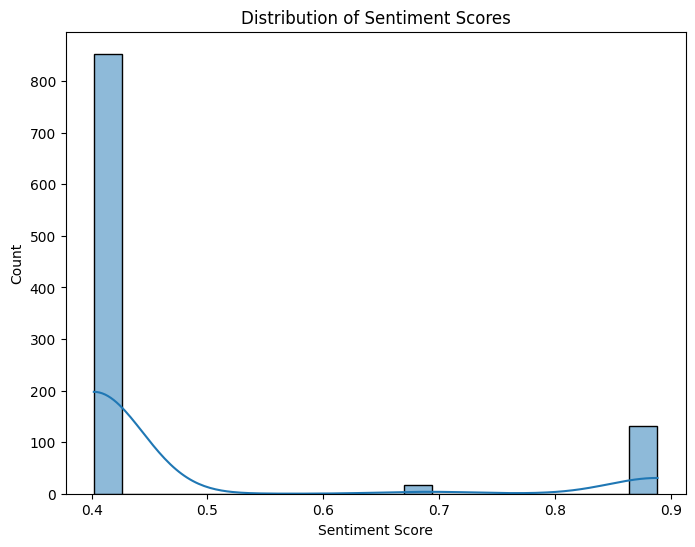

In [ ]:
def rating_to_sentiment(row):
    avg_rating = row[['Subject_Knowledge', 'Explanation_Clarity', 'Presentation_Use',
                      'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure',
                      'Advanced_Support']].mean()
    if avg_rating > 7:
        return f"The course was great with excellent {row['Subject_Knowledge']} subject knowledge and {row['Explanation_Clarity']} clarity in explanations."
    elif avg_rating >= 4:
        return f"The course was decent with {row['Subject_Knowledge']} subject knowledge and {row['Explanation_Clarity']} clarity."
    else:
        return f"The course needs improvement in {row['Subject_Knowledge']} subject knowledge and {row['Explanation_Clarity']} clarity."

data['Text_Feedback'] = data.apply(rating_to_sentiment, axis=1)

sid = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Text_Feedback'].apply(lambda x: sid.polarity_scores(x)['compound'])

plt.figure(figsize=(8, 6))
sns.histplot(data['Sentiment_Score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()



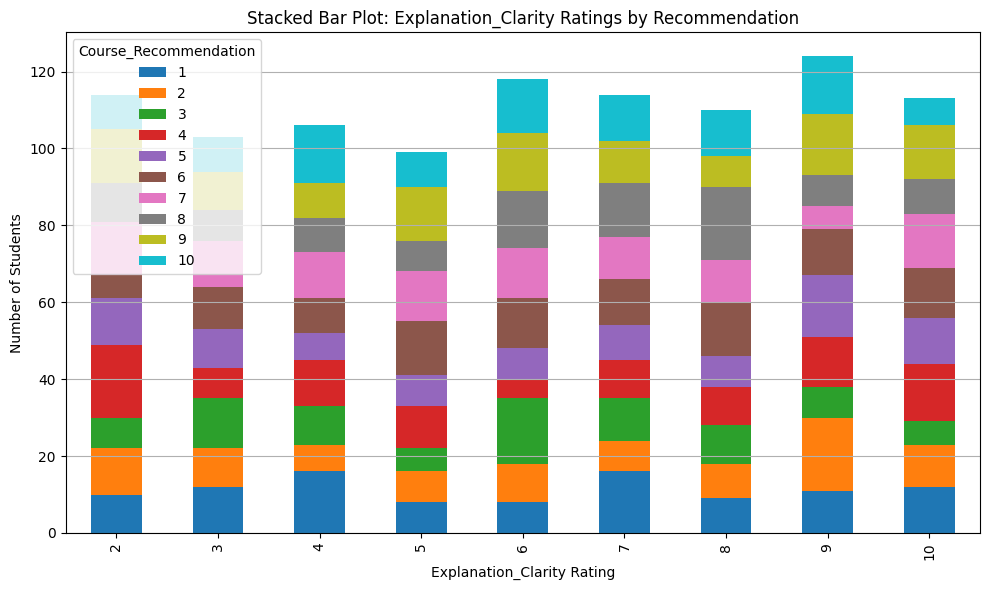

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature = 'Explanation_Clarity'
label = 'Course_Recommendation'

data = data.copy()
data.columns = data.columns.str.strip()


if feature not in data.columns:
    raise KeyError(f"Feature column '{feature}' not found. Available: {data.columns.tolist()}")
if label not in data.columns:
    raise KeyError(f"Label column '{label}' not found. Available: {data.columns.tolist()}")

mapping = {0: 'Not Recommended', 1: 'Recommended'}
if set(data[label].dropna().unique()).issubset({0, 1}):
    data['Recommendation_Text'] = data[label].map(mapping)
    group_label = 'Recommendation_Text'
    legend_title = "Recommendation"
else:
    group_label = label
    legend_title = label


count_data = data.groupby([feature, group_label]).size().unstack(fill_value=0).sort_index()

count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title(f"Stacked Bar Plot: {feature} Ratings by Recommendation")
plt.xlabel(f"{feature} Rating")
plt.ylabel("Number of Students")
plt.legend(title=legend_title)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
data['Recommendation_Label'] = data['Course_Recommendation'].apply(lambda x: 1 if x > 9 else 0)

X = data[['Subject_Knowledge', 'Explanation_Clarity', 'Presentation_Use',
          'Assignment_Difficulty', 'Doubt_Resolution', 'Course_Structure', 'Advanced_Support']]
y = data['Recommendation_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       181
           1       0.00      0.00      0.00        20

    accuracy                           0.90       201
   macro avg       0.45      0.50      0.47       201
weighted avg       0.81      0.90      0.85       201


Confusion Matrix:
 [[181   0]
 [ 20   0]]

Feature Importance:
                  Feature  Importance
5       Course_Structure    0.156212
4       Doubt_Resolution    0.155042
3  Assignment_Difficulty    0.154506
6       Advanced_Support    0.150940
1    Explanation_Clarity    0.147256
0      Subject_Knowledge    0.125320
2       Presentation_Use    0.110723


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


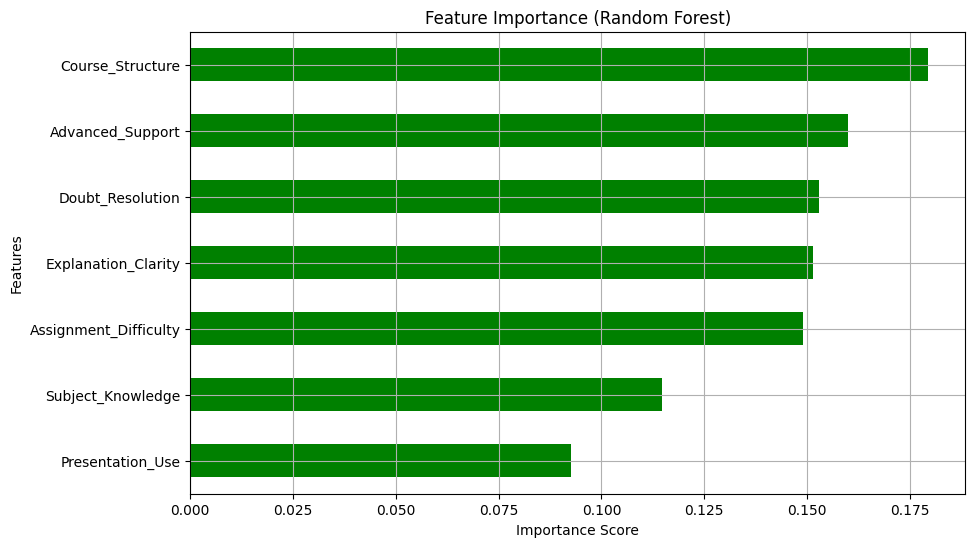

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
rf_model = RandomForestClassifier(
    n_estimators=150, max_depth=5,
    min_samples_split=5, min_samples_leaf=1,
    class_weight='balanced', random_state=42
)

rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', color='green')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()


In [ ]:
print("\nKey Insights:")
print("- The distribution of ratings shows that most features have a wide range of scores, indicating varied student experiences.")
print("- Sentiment analysis reveals that courses with higher average ratings (>7) are perceived positively.")
print("- The Random Forest model indicates that features like Subject Knowledge and Explanation Clarity are strong predictors of course recommendation.")
print("\nRecommendations:")
print("- Focus on improving Explanation Clarity and Subject Knowledge, as they significantly influence course recommendation.")
print("- Consider adjusting assignment difficulty, as it may impact student satisfaction.")
print("- Enhance support for students going above and beyond to increase overall course appeal.")


Key Insights:
- The distribution of ratings shows that most features have a wide range of scores, indicating varied student experiences.
- Sentiment analysis reveals that courses with higher average ratings (>7) are perceived positively.
- The Random Forest model indicates that features like Subject Knowledge and Explanation Clarity are strong predictors of course recommendation.

Recommendations:
- Focus on improving Explanation Clarity and Subject Knowledge, as they significantly influence course recommendation.
- Consider adjusting assignment difficulty, as it may impact student satisfaction.
- Enhance support for students going above and beyond to increase overall course appeal.
